In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from scipy import stats
import gmaps
from ipywidgets.embed import embed_minimal_html
import requests
import pprint

In [2]:
url = "cal.csv"
cal = pd.read_csv(url)
cal

,Unnamed: 0,Severity,Start_Time,Start_Lat,Start_Lng,Street,City,County,State,Zipcode,Temperature(F),Weather_Condition
0,728,3,2016-06-21 10:34:40,38.085300,-122.233017,Magazine St,Vallejo,Solano,CA,94591,75.0,Clear
1,729,3,2016-06-21 10:30:16,37.631813,-122.084167,I-880 N,Hayward,Alameda,CA,94544,75.0,Clear
2,730,2,2016-06-21 10:49:14,37.896564,-122.070717,I-680 N,Walnut Creek,Contra Costa,CA,94595,82.9,Clear
3,731,3,2016-06-21 10:41:42,37.334255,-122.032471,N De Anza Blvd,Cupertino,Santa Clara,CA,95014,75.9,Clear
4,732,2,2016-06-21 10:16:26,37.250729,-121.910713,Norman Y Mineta Hwy,San Jose,Santa Clara,CA,95118,75.2,Clear
...,...,...,...,...,...,...,...,...,...,...,...,...
663199,2974330,2,2019-08-23 18:03:25,34.002480,-117.379360,Pomona Fwy E,Riverside,Riverside,CA,92501,86.0,Fair
663200,2974331,2,2019-08-23 19:11:30,32.766960,-117.148060,I-8 W,San Diego,San Diego,CA,92108,70.0,Fair
663201,2974332,2,2019-08-23 19:00:21,33.775450,-117.847790,Garden Grove Fwy,Orange,Orange,CA,92866,73.0,Partly Cloudy
663202,2974333,2,2019-08-23 19:00:21,33.992460,-118.403020,San Diego Fwy S,Culver City,Los Angeles,CA,90230,71.0,Fair


In [3]:
county_count = cal.groupby('County').count()
city_count = cal.groupby('City').count()

city_count

,Unnamed: 0,Severity,Start_Time,Start_Lat,Start_Lng,Street,County,State,Zipcode,Temperature(F),Weather_Condition
City,,,,,,,,,,,
Acampo,398,398,398,398,398,398,398,398,398,397,397
Acton,1298,1298,1298,1298,1298,1298,1298,1298,1298,1297,1297
Adelanto,60,60,60,60,60,60,60,60,60,19,57
Adin,1,1,1,1,1,1,1,1,1,1,1
Agoura Hills,656,656,656,656,656,656,656,656,656,655,655
...,...,...,...,...,...,...,...,...,...,...,...
Yuba City,233,233,233,233,233,233,233,233,233,232,231
Yucaipa,141,141,141,141,141,141,141,141,141,141,141
Yucca Valley,38,38,38,38,38,38,38,38,38,38,38


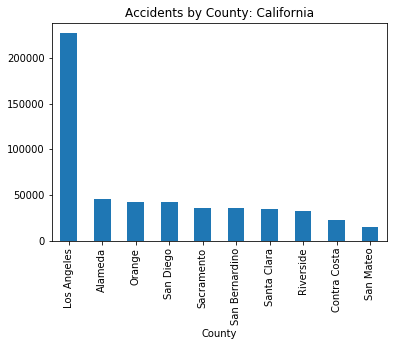

In [125]:
# California counties by number of accidents (normalized by population)
counties = county_count.Severity.sort_values(ascending = False)
top_counties = counties.nlargest(n=10)

counties_plot = top_counties.plot(kind = 'bar', title = 'Accidents by County: California')
plt.savefig('Images/AccidentbyCounty.png')

In [ ]:
# # Import API key
# from api_keys import c_key

In [6]:
# to adjust for population we will need the data for population from the census
# COUNTY	County FIPS code https://api.census.gov/data/2016/pep/population/variables.html
# 050 is State > County https://api.census.gov/data/2016/pep/population
# https://api.census.gov/data/2016/pep/population?get=GEONAME,POP&for=county:*&in=state:*

c_key = "4ddfbbf4d6ce095e4b374bbb3c212ca88cb3027c"
state = "06"
county = "001"

pop_url = "https://api.census.gov/data/2016/pep/population"

query_url = f"{pop_url}?get=GEONAME,POP&for=place:*&in=state:06&key={c_key}"
# query_url = f"{pop_url}?get=GEONAME,POP&for=county:*&in=state:06&key={c_key}"

GEONAME = []
POP = [] 
state = [] 
place = []

# https://api.census.gov/data/2016/pep/population?get=GEONAME,POP&for=place:*&in=state:01%20county:003
# https://api.census.gov/data/2016/pep/population?get=GEONAME,POP&for=county:*&in=state:*
response = requests.get(query_url)

if response:
#     Debugging print statements  
    print("GET URL: " + response.url)
    print("STATUS CODE: " + str(response.status_code))
    response_json = response.json()
#     print(response_json)
  
    for data in response_json:
        
        GEONAME.append(data[0])    
        POP.append(data[1])
        state.append(data[2])
        place.append(data[3])
 
    
else:
    print("API REQUEST ERROR")
    print("STATUS CODE: " + str(response.status_code))
GEONAME = GEONAME[1:]
POP = POP[1:]
state = state[1:]
place = place[1:]

print(GEONAME)  

GET URL: https://api.census.gov/data/2016/pep/population?get=GEONAME,POP&for=place:*&in=state:06&key=4ddfbbf4d6ce095e4b374bbb3c212ca88cb3027c
STATUS CODE: 200
['Arvin city, California', 'Atascadero city, California', 'Atherton town, California', 'Atwater city, California', 'Auburn city, California', 'Avalon city, California', 'Avenal city, California', 'Azusa city, California', 'Bakersfield city, California', 'Baldwin Park city, California', 'Banning city, California', 'Barstow city, California', 'Beaumont city, California', 'Bell city, California', 'Bellflower city, California', 'Bell Gardens city, California', 'Belmont city, California', 'Belvedere city, California', 'Benicia city, California', 'Berkeley city, California', 'Beverly Hills city, California', 'Big Bear Lake city, California', 'Biggs city, California', 'Bishop city, California', 'Blue Lake city, California', 'Blythe city, California', 'Bradbury city, California', 'Brawley city, California', 'Brea city, California', 'Bren

In [20]:
# Take the lists and make a dictionary
census_dict = {
    "City": GEONAME,
    "Population": POP,
    "State": state,
    "County": place
}

# Make a data frame from the dictionary
census_data = pd.DataFrame(census_dict)

census_data

,City,Population,State,County
0,"Arvin city, California",21086,06,02924
1,"Atascadero city, California",30330,06,03064
2,"Atherton town, California",7207,06,03092
3,"Atwater city, California",29270,06,03162
4,"Auburn city, California",13963,06,03204
...,...,...,...,...
477,"Santa Maria city, California",106290,06,69196
478,"Santa Monica city, California",92478,06,70000
479,"Santa Paula city, California",30335,06,70042
480,"Santa Rosa city, California",175155,06,70098


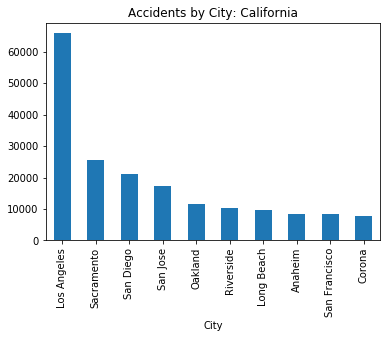

In [126]:
# Top 5 Cities that have the most accidents
cities_count = city_count.Severity.sort_values(ascending = False)
top_cities = cities_count.nlargest(n =10)

cities_plot = top_cities.plot(kind = 'bar', title = 'Accidents by City: California')

plt.savefig('Images/AccidentbyCity_notadj.png')

In [22]:
census_data['Population'] = census_data['Population'].astype(float)

census_data.sort_values('Population', ascending = False)


,City,Population,State,County
217,"Los Angeles city, California",3976322.0,06,44000
364,"San Diego city, California",1406630.0,06,66000
406,"San Jose city, California",1025350.0,06,68000
384,"San Francisco city, California",870887.0,06,67000
233,"Fresno city, California",522053.0,06,27000
...,...,...,...,...
363,"Sand City city, California",383.0,06,65112
61,"Trinidad city, California",359.0,06,80448
396,"Industry city, California",205.0,06,36490
42,"Amador City city, California",191.0,06,01514


In [24]:
census_data[['City','State']] = census_data.City.str.split(",",expand=True) 


ValueError: Columns must be same length as key

In [27]:
census_data["City2"] = census_data.City.str.slice(0,4,1)
census_data["City2"] = census_data.City.str.slice(0,-5,1)

census_data


,City,Population,State,County,City2
0,Arvin city,21086.0,California,02924,Arvin
1,Atascadero city,30330.0,California,03064,Atascadero
2,Atherton town,7207.0,California,03092,Atherton
3,Atwater city,29270.0,California,03162,Atwater
4,Auburn city,13963.0,California,03204,Auburn
...,...,...,...,...,...
477,Santa Maria city,106290.0,California,69196,Santa Maria
478,Santa Monica city,92478.0,California,70000,Santa Monica
479,Santa Paula city,30335.0,California,70042,Santa Paula
480,Santa Rosa city,175155.0,California,70098,Santa Rosa


In [31]:
census_data = census_data[['City2', 'Population', 'State','County']]

census_data.rename(columns = {'City2':'City'}, inplace = True)


KeyError: "['City2'] not in index"

In [71]:
census_data

options = ['Los Angeles', 
           'Sacramento', 
           'San Diego', 
           'San Jose', 
           'Oakland', 
           'Riverside', 
           'Long Beach', 
           'Anaheim', 
           'San Francisco', 
           'Corona']

top_cities_pop = census_data[census_data['City'].isin(options)]
  
print('\nResult dataframe :\n', top_cities_pop) 


Result dataframe :
               City  Population        State County
44         Anaheim    351043.0   California  02000
212     Long Beach    470130.0   California  43000
217    Los Angeles   3976322.0   California  44000
293      Riverside    324722.0   California  62000
337     Sacramento    495234.0   California  64000
364      San Diego   1406630.0   California  66000
368         Corona    166785.0   California  16350
384  San Francisco    870887.0   California  67000
406       San Jose   1025350.0   California  68000
425        Oakland    420005.0   California  53000


In [72]:
top_cities = top_cities.to_frame()


AttributeError: 'DataFrame' object has no attribute 'to_frame'

In [73]:
top_cities

top_cites_adj = top_cities.merge(top_cities_pop, on='City')  


In [74]:
# check data frame for errors
top_cites_adj


,City,Severity,Population,State,County
0,Los Angeles,65851,3976322.0,California,44000
1,Sacramento,25657,495234.0,California,64000
2,San Diego,21045,1406630.0,California,66000
3,San Jose,17395,1025350.0,California,68000
4,Oakland,11602,420005.0,California,53000
5,Riverside,10249,324722.0,California,62000
6,Long Beach,9743,470130.0,California,43000
7,Anaheim,8480,351043.0,California,02000
8,San Francisco,8314,870887.0,California,67000
9,Corona,7620,166785.0,California,16350


In [75]:
adj_accidents = top_cites_adj.Severity/top_cites_adj.Population

adj_accidents = adj_accidents.to_frame()

top_cites_adj = top_cites_adj.merge(adj_accidents, left_index = True, right_index = True)  

In [79]:
top_cites_adj

list(top_cites_adj.columns) 

['City', 'Severity', 'Population', 'State', 'County', 0]

In [87]:
top_cites_adj = top_cites_adj.rename(columns = {0:'Accidents/Population', 'Severity': 'Accident Count'})

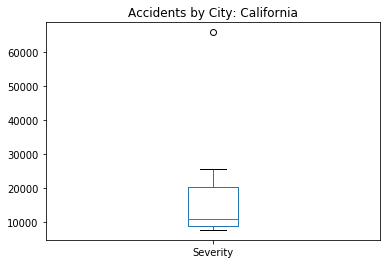

In [127]:
box_cities = top_cities.plot(kind = 'box', title = 'Accidents by City: California')
plt.savefig('Images/AdjAccidentbyCityLA.png')

In [91]:
top_cites_adj

,City,Accident Count,Population,State,County,Accidents/Population
0,Los Angeles,65851,3976322.0,California,44000,0.016561
1,Sacramento,25657,495234.0,California,64000,0.051808
2,San Diego,21045,1406630.0,California,66000,0.014961
3,San Jose,17395,1025350.0,California,68000,0.016965
4,Oakland,11602,420005.0,California,53000,0.027623
5,Riverside,10249,324722.0,California,62000,0.031562
6,Long Beach,9743,470130.0,California,43000,0.020724
7,Anaheim,8480,351043.0,California,02000,0.024157
8,San Francisco,8314,870887.0,California,67000,0.009547
9,Corona,7620,166785.0,California,16350,0.045688


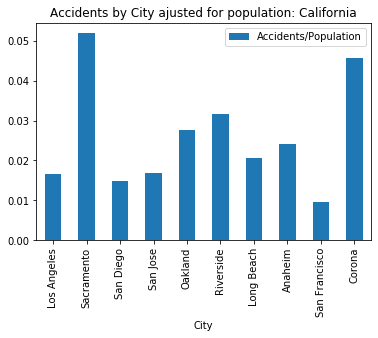

In [128]:
# # Top 5 Cities that have the most accidents adjusted
x_axis = top_cites_adj['City']
y_axis = top_cites_adj['Accidents/Population']

adj_cities_plot = top_cites_adj.plot(x = 'City', y = 'Accidents/Population', kind = 'bar', 
                                     title = 'Accidents by City ajusted for population: California')

plt.savefig('Images/AdjAccidentbyCity.png') 

Los Angeles is the clear outlier in the non-population adjusted set

In [105]:
# Import API key
from api_keys import g_key


In [106]:
#State heat map with markers for accidents
gmaps.configure(api_key=g_key)

# Store latitude and longitude in locations
locations = cal[["Start_Lat", "Start_Lng"]]

accidents = cal['Severity']

In [107]:
cal_test = cal[0:100]
cal_test

,Unnamed: 0,Severity,Start_Time,Start_Lat,Start_Lng,Street,City,County,State,Zipcode,Temperature(F),Weather_Condition
0,728,3,2016-06-21 10:34:40,38.085300,-122.233017,Magazine St,Vallejo,Solano,CA,94591,75.0,Clear
1,729,3,2016-06-21 10:30:16,37.631813,-122.084167,I-880 N,Hayward,Alameda,CA,94544,75.0,Clear
2,730,2,2016-06-21 10:49:14,37.896564,-122.070717,I-680 N,Walnut Creek,Contra Costa,CA,94595,82.9,Clear
3,731,3,2016-06-21 10:41:42,37.334255,-122.032471,N De Anza Blvd,Cupertino,Santa Clara,CA,95014,75.9,Clear
4,732,2,2016-06-21 10:16:26,37.250729,-121.910713,Norman Y Mineta Hwy,San Jose,Santa Clara,CA,95118,75.2,Clear
...,...,...,...,...,...,...,...,...,...,...,...,...
95,823,2,2016-06-21 23:46:57,38.714298,-121.540237,W Elverta Rd,Sacramento,Sacramento,CA,95836,71.1,Clear
96,824,3,2016-06-22 00:29:47,37.692780,-122.101685,I-580 W,Hayward,Alameda,CA,94541,59.0,Clear
97,825,2,2016-06-22 00:29:20,39.267353,-121.028770,State Highway 49,Nevada City,Nevada,CA,95959,73.4,Clear
98,826,2,2016-06-22 00:40:26,39.098984,-122.804314,Foothill Dr,Nice,Lake,CA,95464,64.0,Clear


In [108]:
# Plot Heatmap
fig  = gmaps.figure()

# Create heat layer
heat_layer = gmaps.heatmap_layer(locations, dissipating=True, max_intensity=10, point_radius=1)

# Add layer
fig.add_layer(heat_layer)

#Display figure
fig

Figure(layout=FigureLayout(height='420px'))

In [109]:
 embed_minimal_html('export.html', views=[fig])